# <span style="color: tomato;">            Paint Black & White Photos</span>
by: Mika Yosef

<img src="mountain.jpg"/> <img src="mountain_pred.jpg"/>

<!-- ![](test.jpg) -->
<!-- ![](colorfig2.jpg) -->

<!-- <img src="first_test.jpg"/> -->

This project allows you to bring the image back to life.

by using the dataset CIFAR10 (data that include 25K different pictures of variance objects: cats, deers, airplains, trucks etc.), I built a model, based on Neural Network.
the model goal is to success to take a black & white picture and make it colorful.




In [1]:
import torch
import matplotlib.pyplot as plt
import torch.optim as optim
import torch.nn as nn

In [2]:
from BW_dataset import BWDataset
from net import CONVNet
from net import FULLNet # if you want to try train the model on the other NN
from train_val import train
from preview import imshow_to_numpy
from test_and_save import test_paint
from preview import preview
from preview import imshow_to_numpy
torch.backends.cudnn.benchmark = True


# Main Definitions

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
batch_size = 50


trainset = BWDataset(train=True, download=True,device=device)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=0)

valset = BWDataset(train=False, download=True,device=device)
valloader = torch.utils.data.DataLoader(valset, batch_size=batch_size, shuffle=False, num_workers=0)

PATH = './data/conv_20epoch.ckpt'

Files already downloaded and verified
Files already downloaded and verified


In [4]:
NET = CONVNet().to(device)


criterion = nn.L1Loss(reduction="mean").to(device)
optimizer = optim.Adam(NET.parameters(), lr=0.0001)

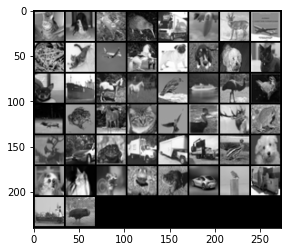

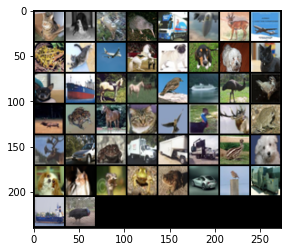

In [5]:
preview(trainloader)

# Train a Model

In [6]:
train_set_loss, val_set_loss, number_of_epochs = train(100,trainloader,valloader,optimizer,criterion, NET, PATH)

Val Loss: 0.045228: 100%|██████████| 100/100 [4:07:36<00:00, 148.56s/it]

Finished Training


Afret training the model with the CONV network for 100 epochs, with batch size of 50, I'll save it:

In [7]:
torch.save(NET.state_dict(), PATH) 

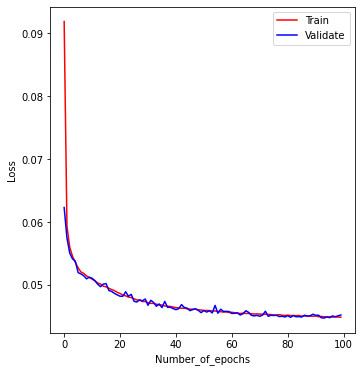

In [13]:

plt.figure( figsize=(12,6))

plt.subplot(121)
plt.plot(number_of_epochs,train_set_loss,'r',label = 'Train')
plt.plot(number_of_epochs,val_set_loss,'b',label = 'Validate')
plt.xlabel('Number_of_epochs'); plt.ylabel('Loss');
plt.legend()

plt.show()

This graph show me that the loss of the validation improve as the number of epochs increase. Hence, I didn't change the epochs number to get better results

# Checking the validation results:
The model shows a loss of 0.45. To make sure, I want to check it on one random colorful image from the validation data, and compare it to the painting prdicted image:

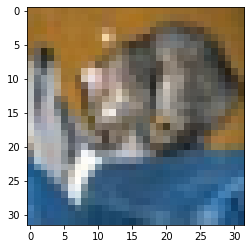

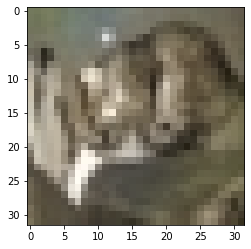

validation loss of the picture: 0.0458381325006485


In [14]:
val_loss = 0
with torch.no_grad():
    for idx, data in enumerate(valloader):
        gray, color = data
        outputs = NET(gray)
        loss = criterion(outputs, color)
        val_loss += loss.item()


        imshow_to_numpy(color[0])
        plt.figure()
        imshow_to_numpy(outputs[0])
        break
    print(f"validation loss of the picture: {val_loss}")

## Reload the Model

I used the model I've already trained to check it ability to paint an image that wasn't included in the dataset.


To be able to evaluate better the results, I tryed a variance of picture to find the strength and weakness of the model.


below you can see some of the original gray picture and the new colorful picture by the model: 

In [5]:
NET.load_state_dict(torch.load(PATH))
NET.eval()

CONVNet(
  (conv1): Conv2d(1, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), padding_mode=reflect)
  (conv2): Conv2d(12, 25, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), padding_mode=reflect)
  (conv3): Conv2d(25, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), padding_mode=reflect)
  (conv4): Conv2d(40, 55, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), padding_mode=reflect)
  (conv5): Conv2d(55, 70, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), padding_mode=reflect)
  (conv6): Conv2d(70, 60, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), padding_mode=reflect)
  (conv7): Conv2d(60, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), padding_mode=reflect)
  (conv8): Conv2d(40, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), padding_mode=reflect)
  (conv9): Conv2d(20, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), padding_mode=reflect)
  (conv10): Conv2d(10, 5, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), padding_mode=reflect)
  

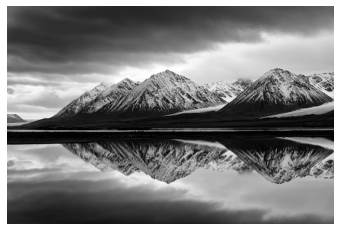

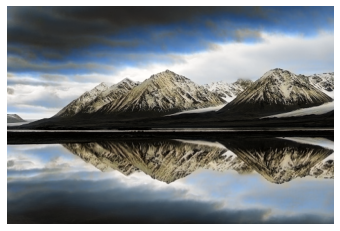

In [6]:
test_paint("mountain",device, NET)


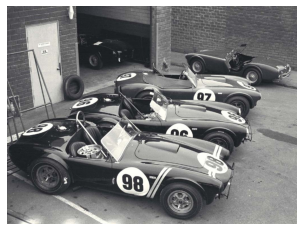

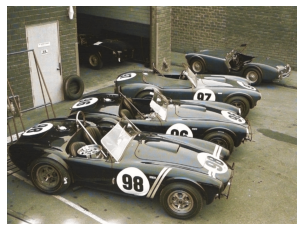

In [7]:
test_paint("cars",device, NET)

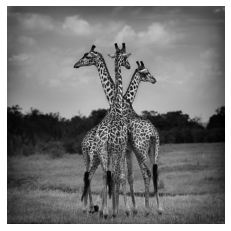

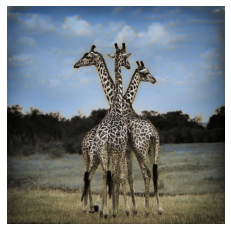

In [19]:
test_paint("girraf",device, NET)

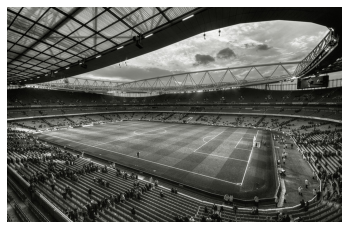

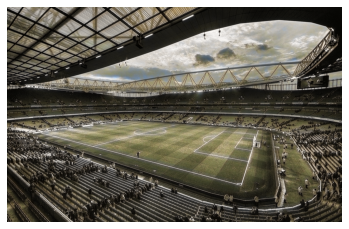

In [27]:
test_paint("football",device, NET)

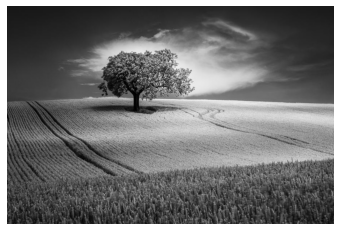

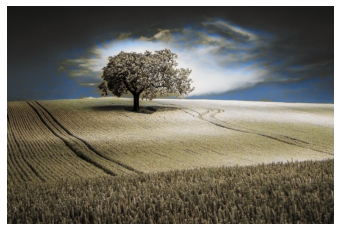

In [15]:
test_paint("trees",device, NET)